In [1]:
import numpy as np
import scipy.special as spe
import pickle
from pathlib import Path
from matplotlib import cm

from robust_motifs.data import load_sparse_matrix_from_pkl
from robust_motifs.plot import (compare_graphs, compare_graphs_normalized, compare_graphs_percent, 
                                plot_biedge_cumulative, plot_simplex_counts, plot_biedge_counts, 
                                compare_graphs_diff, compare_graphs_diff_normalized, compare_graphs_diff_percent)

import pandas as pd
from itertools import combinations

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def retrieve_sample_data(path, label: str, maximal: bool = False):
    df = pd.DataFrame(columns = ["dimension", "count", "label"])
    if maximal:
        file_path_list = path.glob("**/total_rmbcounts.pkl")
    else:
        file_path_list = path.glob("**/total_rbcounts.pkl")
    for file_path in file_path_list:
        with open(file_path, 'rb') as file:
            d = pickle.load(file)
            for key, item in d.items():
                dftemp = pd.DataFrame([[key, float(item), label]], columns = ["dimension", "count", "label"])
                df = df.append(dftemp)
    df = df.dropna()
    return df
    

# Worm

In [26]:
path_list = [Path("data/worm/full_nomuscle"),
             Path("data/worm_control_nomuscle/underlying"),
             Path("data/worm_control_nomuscle/bishuffled")]

In [27]:
label_list = [path.parts[-1] for path in path_list]
label_list[0] = "C. Elegans"

## Plots

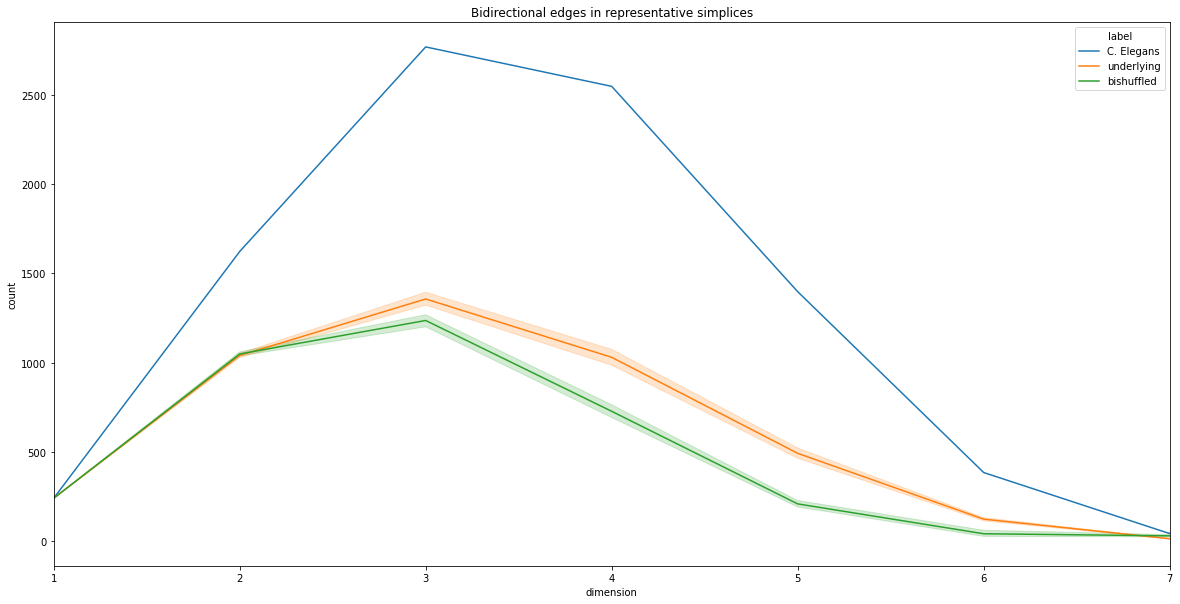

In [29]:
title = "Bidirectional edges in representative simplices"
df = pd.DataFrame()
for path, label in zip(path_list, label_list):
    df = df.append(retrieve_sample_data(path, label, maximal = False))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title(title)
ax.set_xlim([1,7])
fig.savefig(title.replace(" ", "_") + "_worm")

    

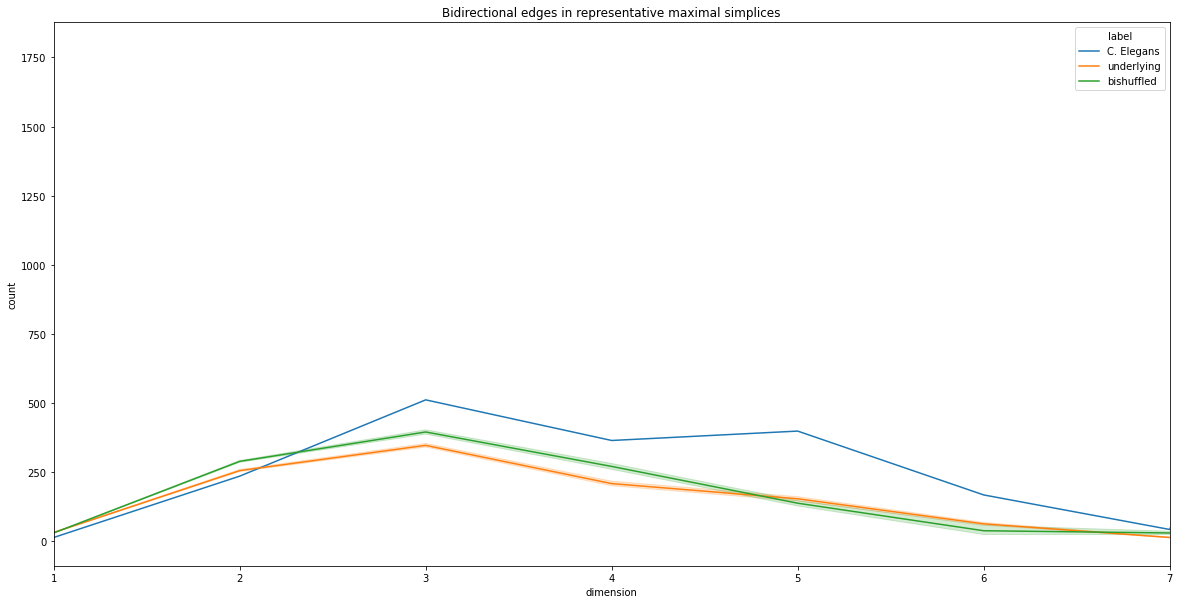

In [30]:
title = "Bidirectional edges in representative maximal simplices"
df = pd.DataFrame()
for path, label in zip(path_list, label_list):
    df = df.append(retrieve_sample_data(path, label, maximal = True))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title(title)
ax.set_xlim([1,7])
fig.savefig(title.replace(" ", "_") + "_worm_maximal")


# BBP

In [33]:
path_list = [Path("data/bcounts/column"),
             Path("data/bcounts/underlying_1"),
             Path("data/bcounts/bshuffled_1")]

In [34]:
label_list = ["Microcircuit", "underlying", "bishuffled"]

## Max dim table

## Plots

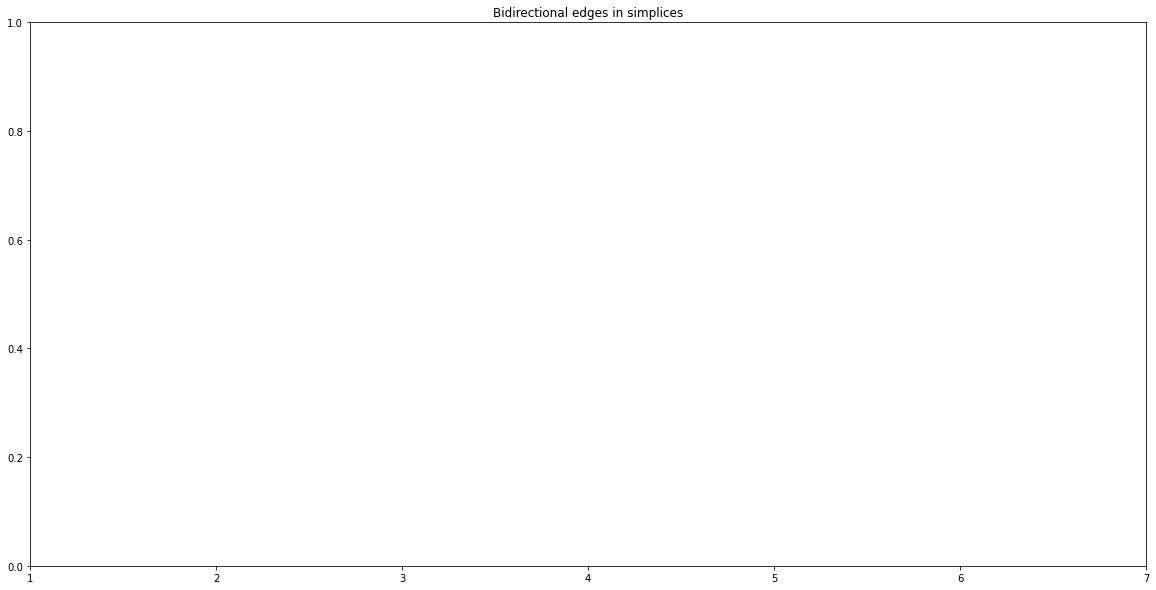

In [35]:
title = "Bidirectional edges in simplices"
df = pd.DataFrame()
for path, label in zip(path_list, label_list):
    df = df.append(retrieve_sample_data(path, label, maximal = False))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title(title)
ax.set_xlim([1,7])
fig.savefig(title.replace(" ", "_") + "_bbpv5")


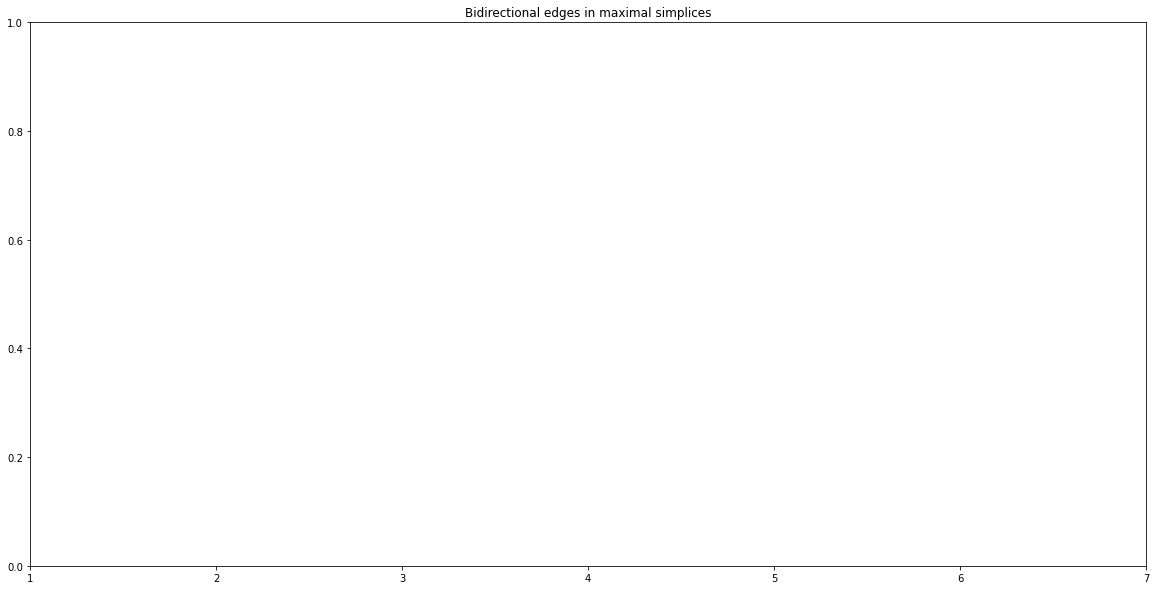

In [36]:
title = "Bidirectional edges in maximal simplices"
df = pd.DataFrame()
for path, label in zip(path_list, label_list):
    df = df.append(retrieve_sample_data(path, label, maximal = True))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title(title)
ax.set_xlim([1,7])
fig.savefig(title.replace(" ", "_") + "_bbpv5_maximal")
    

# Comparison

In [ ]:
df = pd.DataFrame()
worm_path = Path("data/worm/full_nomuscle")
column_path = Path("data/bcounts/column")
df = df.append(retrieve_sample_data(worm_path, "C. Elegans", maximal = False))
df = df.append(retrieve_sample_data(column_path, "Microcircuit", maximal = False))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title("Normalized bidirectional edge counts for representative simplices")
fig.savefig("Normalized_bedge_count_comparison")

In [ ]:
df = pd.DataFrame()
worm_path = Path("data/worm/full_nomuscle")
column_path = Path("data/bcounts/column")
df = df.append(retrieve_sample_data(worm_path, "C. Elegans", maximal = True))
df = df.append(retrieve_sample_data(column_path, "Microcircuit", maximal = True))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title("Normalized bidirectional edge counts, representative maximal simplices")
fig.savefig("Normalized_bedge_count_comparison_maximal")